# देवनागरी हस्तलिखित अक्षरों को पहचानना

In [17]:


import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
train_path = "/Users/shyamalmishra/Downloads/DevanagariHindiMNIST/Hindi/Train"
test_path = "/Users/shyamalmishra/Downloads/DevanagariHindiMNIST/Hindi/Test"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(32, 32),
    color_mode='grayscale',
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(32, 32),
    color_mode='grayscale',
    class_mode='categorical'
)

Found 78200 images belonging to 46 classes.
Found 13800 images belonging to 46 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(46, activation='softmax')
])

2025-07-06 03:19:42.064849: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-07-06 03:19:42.064998: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-07-06 03:19:42.065010: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-07-06 03:19:42.065043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-06 03:19:42.065057: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
   1/2444 [..............................] - ETA: 14:35 - loss: 3.9018 - accuracy: 0.0000e+00

2025-07-06 03:24:51.366865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2444/2444 [==============================] - 25s 10ms/step - loss: 1.7518 - accuracy: 0.6315 - val_loss: 0.3523 - val_accuracy: 0.9041
Epoch 2/10
2444/2444 [==============================] - 25s 10ms/step - loss: 0.8861 - accuracy: 0.8091 - val_loss: 0.3035 - val_accuracy: 0.9268
Epoch 3/10
2444/2444 [==============================] - 25s 10ms/step - loss: 0.8747 - accuracy: 0.8377 - val_loss: 0.2969 - val_accuracy: 0.9407
Epoch 4/10
2444/2444 [==============================] - 25s 10ms/step - loss: 0.9747 - accuracy: 0.8568 - val_loss: 0.3783 - val_accuracy: 0.9443
Epoch 5/10
2444/2444 [==============================] - 25s 10ms/step - loss: 1.1578 - accuracy: 0.8697 - val_loss: 0.4754 - val_accuracy: 0.9445
Epoch 6/10
2444/2444 [==============================] - 25s 10ms/step - loss: 1.3111 - accuracy: 0.8801 - val_loss: 0.4368 - val_accuracy: 0.9573
Epoch 7/10
2444/2444 [==============================] - 26s 10ms/step - loss: 1.5724 - accuracy: 0.8862 - val_loss: 0.6171 - val_accura

In [8]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

432/432 [==============================] - 3s 6ms/step - loss: 1.0342 - accuracy: 0.9630
Test Accuracy: 96.30%


1/1 [==============================] - 0s 10ms/step


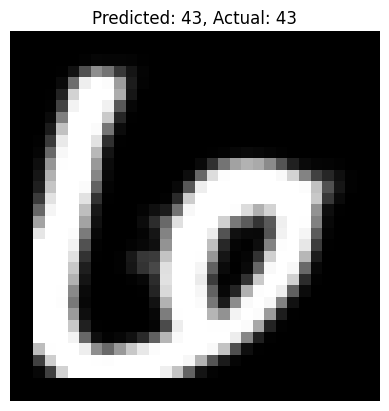

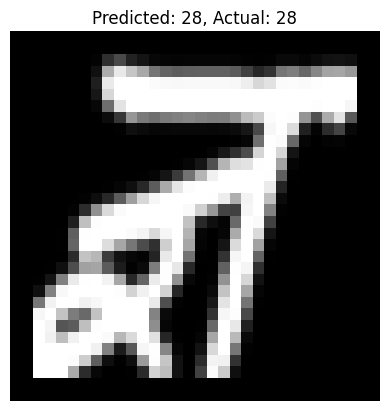

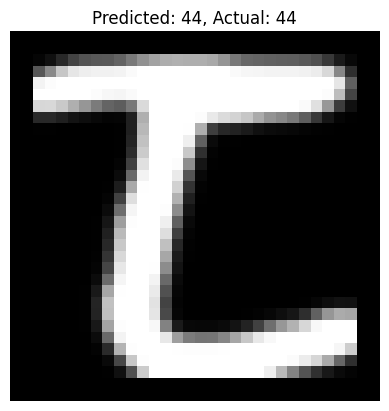

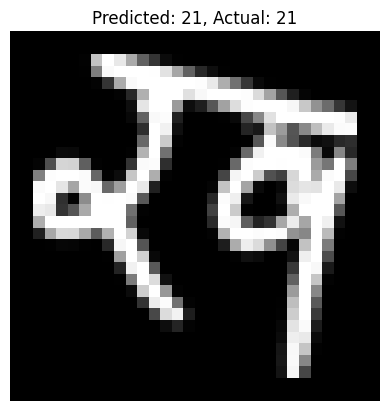

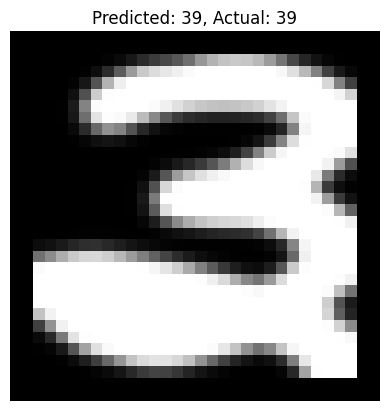

In [16]:
sample_images, sample_labels = next(test_generator)
predictions = model.predict(sample_images)

for i in range(5):
    plt.imshow(sample_images[i].reshape(32, 32), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(sample_labels[i])}")
    plt.axis('off')
    plt.show()